In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

## Prepare the Dataset for training

In [ ]:
# Import the dataframe 
df: pd.DataFrame = pd.read_csv('Datasets/trainingdata.csv')

In [ ]:
# Removing unnecessary columns
columns_to_remove = [
    'werknemer_id',
    'klant_id',
    'geboortedatum',
    'geslacht_id',
    'geslacht',
    'status',
    'geslacht_id_Man',
    'geslacht_id_Vrouw',
    'stad',
    'status_jaar',                         
    'status_actief',                       
    'status_beëindigd',                                             
    'uitdienst_reden_Niet van toepassing',  
    'uitdienst_reden_Ontslag',             
    'uitdienst_reden_Vertrek',
    'startdatum',
    'einddatum',
    'datum',
    'leeftijd'
]

df.drop(columns=columns_to_remove, inplace=True)

In [2]:
# Import the dataframe  and change the order of the columns
column_order =  ['leeftijd_begin_dienst', 'reisafstand', 'dienstperiode', 'aantal_geboortes_pf',
          'afdeling_Accountant', 'afdeling_Administratief medewerker', 'afdeling_BI',
          'afdeling_Boekhouder', 'afdeling_Business analist', 'afdeling_Business controller',
          'afdeling_Business development', 'afdeling_Credit controller', 'afdeling_Financial controller',
          'afdeling_HR', 'afdeling_IT', 'afdeling_Legal', 'afdeling_Marketing',
          'afdeling_Office manager', 'afdeling_Project controller', 'business_unit_Detachering',
          'business_unit_Intern']

df = df[column_order]

Index(['dienstperiode', 'reisafstand', 'afdeling_Accountant',
       'afdeling_Administratief medewerker', 'afdeling_BI',
       'afdeling_Boekhouder', 'afdeling_Business analist',
       'afdeling_Business controller', 'afdeling_Business development',
       'afdeling_Credit controller', 'afdeling_Financial controller',
       'afdeling_HR', 'afdeling_IT', 'afdeling_Legal', 'afdeling_Marketing',
       'afdeling_Office manager', 'afdeling_Project controller',
       'business_unit_Detachering', 'business_unit_Intern', 'aantal_geboortes',
       'aantal_geboortes_pf', 'leeftijd_begin_dienst'],
      dtype='object')


# Split the dataset into training and testing data

In [5]:
# Data preparation
columns_to_drop = ['dienstperiode'] 

X = df.drop(columns=columns_to_drop, axis=1) 
y = df['dienstperiode'] 

# Split the dataframe into Training (80%) and Testing (20%) in order to train the models.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

,leeftijd_begin_dienst,reisafstand,dienstperiode,aantal_geboortes_pf,afdeling_Accountant,afdeling_Administratief medewerker,afdeling_BI,afdeling_Boekhouder,afdeling_Business analist,afdeling_Business controller,...,afdeling_Credit controller,afdeling_Financial controller,afdeling_HR,afdeling_IT,afdeling_Legal,afdeling_Marketing,afdeling_Office manager,afdeling_Project controller,business_unit_Detachering,business_unit_Intern
0,30.0,113,9,48.5,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,21.0,53,1,32.1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,19.0,112,2,46.1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,21.0,105,6,38.9,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,40.0,53,20,32.1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6313,52.0,53,11,32.1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
6314,23.0,111,5,30.3,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
6315,40.0,53,20,36.4,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
6316,41.0,114,17,48.1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


# Create a KNN model

In [6]:
# Model building and training
# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Create a GridSearchCV object
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)

# Fit the model to the data
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters:", grid_search.best_params_)

# Get the best model
knn_model = grid_search.best_estimator_

knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [7]:
# Predicting
y_pred = knn_model.predict(X_test_scaled)

# Evaluatie
accuracy: float = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Gedetailleerd rapport
print(classification_report(y_test, y_pred))

Accuracy: 0.13
              precision    recall  f1-score   support

           0       0.19      0.36      0.25        61
           1       0.16      0.21      0.18        76
           2       0.13      0.13      0.13        54
           3       0.07      0.07      0.07        30
           4       0.04      0.05      0.05        42
           5       0.06      0.07      0.07        43
           6       0.06      0.06      0.06        48
           7       0.13      0.19      0.15        53
           8       0.11      0.08      0.09        63
           9       0.06      0.12      0.08        50
          10       0.07      0.05      0.06        65
          11       0.08      0.04      0.05        74
          12       0.27      0.22      0.24        81
          13       0.22      0.22      0.22        60
          14       0.48      0.32      0.38        47
          15       0.11      0.05      0.07        21
          16       0.06      0.15      0.09        39
          17

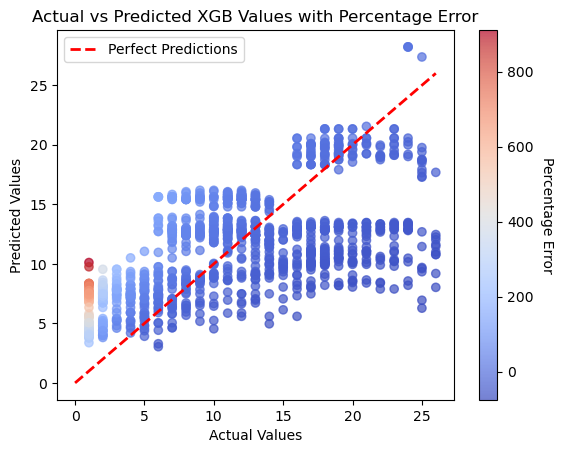

In [19]:
percentage_error: float = ((y_pred - y_test) / y_test) * 100 #Hoeveel percentage zit het model ernaast

plt.scatter(y_test, y_pred, c=percentage_error, cmap='coolwarm', alpha=0.7)

cbar: plt.colorbar = plt.colorbar()
cbar.set_label('Percentage Error', rotation=270, labelpad=15)

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Perfect Predictions')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted XGB Values with Percentage Error')

plt.legend()
plt.show()

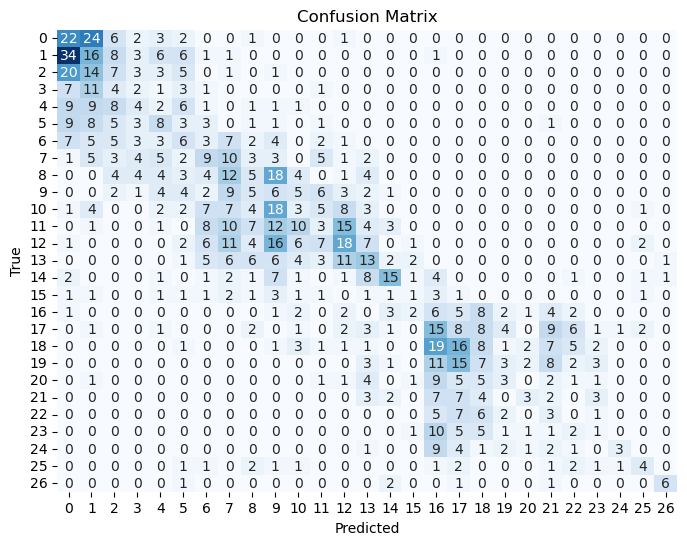

In [8]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [9]:
# Assume y_pred is your predicted values
y_pred_adjusted = np.maximum(y_pred, 2)

# Calculate the percentage of predictions within 30%
percentage_within_30_percent: float = np.sum(np.abs(y_test - y_pred_adjusted) <= 0.30 * y_test) / len(y_test) * 100

print(f"Adjusted percentage of predictions within 30% of actual dienstperiode (with minimum of 2 years): {percentage_within_30_percent:.2f}%")

Adjusted percentage of predictions within 30% of actual dienstperiode (with minimum of 2 years): 58.31%


In [10]:
pickle.dump(knn_model, open("saved_model.sav", "wb"))

# Train and XGBoost model 

In [11]:
max_depth_value = 5
model = XGBRegressor(max_depth=max_depth_value)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 7.842552382771701
R^2 Score: 0.8391240881489477


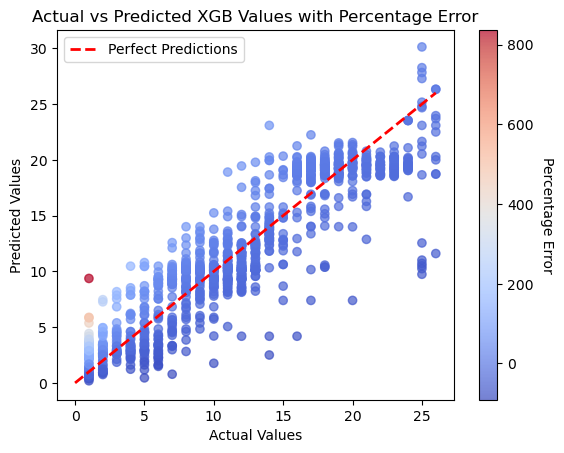

In [12]:
percentage_error = ((y_pred - y_test) / y_test) * 100 #Hoeveel percentage zit het model ernaast

plt.scatter(y_test, y_pred, c=percentage_error, cmap='coolwarm', alpha=0.7)

cbar = plt.colorbar()
cbar.set_label('Percentage Error', rotation=270, labelpad=15)

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Perfect Predictions')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted XGB Values with Percentage Error')

plt.legend()
plt.show()


In [15]:
new_employee_data = pd.DataFrame({
    'leeftijd_begin_dienst' :[35],
    'reisafstand': [15],
    'aantal_geboortes_pf' : [5],
    'afdeling_Accountant': [0],
    'afdeling_Administratief medewerker': [0],
    'afdeling_BI': [0],
    'afdeling_Boekhouder': [0],
    'afdeling_Business analist': [0],
    'afdeling_Business controller': [0],
    'afdeling_Business development' :[0],
    'afdeling_Credit controller' :[0],
    'afdeling_Financial controller': [0],
    'afdeling_HR': [0],
    'afdeling_IT': [0],
    'afdeling_Legal': [0],
    'afdeling_Marketing': [1],
    'afdeling_Office manager': [0],
    'afdeling_Project controller': [0],
    'business_unit_Detachering': [1],
    'business_unit_Intern': [0],
})
              
predicted_dienstperiode = model.predict(new_employee_data)
percentage_error_new_data = (abs((predicted_dienstperiode - y_test.mean())) / y_test.mean()) * 100

if np.max(np.abs(percentage_error_new_data)) <= 20: #acceptabel percentage af
    print("Deze uitkomst is acceptabel.")
else:
    print("Deze uitkomst heeft een hogere kans op onnauwkeurigheid")

print("Verwachte dienstperiode:", predicted_dienstperiode, "jaar.")
print("Percentage afwijking van testset:", percentage_error_new_data, "%.")

Deze uitkomst heeft een hogere kans op onnauwkeurigheid
Verwachte dienstperiode: [17.333471] jaar.
Percentage afwijking van testset: [53.761715] %.


# Linear regression

In [17]:
model = LinearRegression()

model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

Mean Squared Error: 28.945722310897732
Coefficients: [ 2.29330621e+00 -2.39816762e-01  2.25887283e-01  1.21610976e+13
  3.02915286e+12  1.26186522e+13  1.39117005e+13  1.02506814e+13
 -3.43155723e+10  2.17221857e+12  9.34159233e+12  1.38701499e+13
  2.80041909e+12  1.71045020e+12  1.50061039e+12  2.46159575e+12
  1.57369743e+12  5.76751665e+12  2.12231442e+13  2.12231442e+13]
Intercept: 10.921781537356736


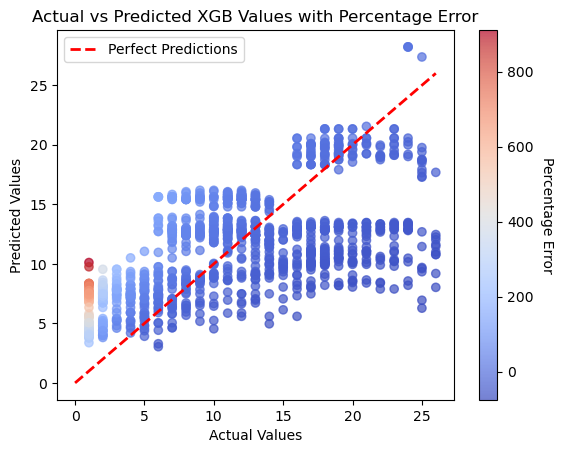

In [20]:
percentage_error = ((y_pred - y_test) / y_test) * 100 #Hoeveel percentage zit het model ernaast

plt.scatter(y_test, y_pred, c=percentage_error, cmap='coolwarm', alpha=0.7)

cbar = plt.colorbar()
cbar.set_label('Percentage Error', rotation=270, labelpad=15)

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Perfect Predictions')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted XGB Values with Percentage Error')

plt.legend()
plt.show()